### Exercise 2.3 Fundamentals of Visualization libraries - Part 1 -Matplotlib

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt

In [2]:
import matplotlib
matplotlib.__version__

'3.10.0'

#### Importing dataset

In [5]:
df_merged = pd.read_csv('NewYork_Bikes_data.csv', index_col = 0)

/var/folders/bm/wxz2f90s7x104nl7tfs2lwdw0000gn/T/ipykernel_41345/3332620009.py:1: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_merged = pd.read_csv('NewYork_Bikes_data.csv', index_col = 0)


In [6]:
df_merged.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', '_merge'],
      dtype='object')

In [7]:
df_merged.drop(columns = {'_merge'}, inplace = True)

In [8]:
df_merged.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp
0,9D0DC440CB40CF8E,electric_bike,2022-08-27 13:56:47.728,2022-08-27 14:02:56.651,Flatbush Ave & Ocean Ave,3704.04,3 St & Prospect Park West,3865.05,40.663657,-73.963014,40.668132,-73.973638,casual,2022-08-27,27.8
1,2214991DFBE5C4D7,electric_bike,2022-08-20 10:37:02.756,2022-08-20 10:45:56.631,Forsyth St\t& Grand St,5382.07,E 11 St & 1 Ave,5746.14,40.717798,-73.993161,40.729538,-73.984267,casual,2022-08-20,27.9
2,20C5D469563B6337,classic_bike,2022-08-31 18:55:03.051,2022-08-31 19:03:37.344,Perry St & Bleecker St,5922.07,Grand St & Greene St,5500.02,40.735354,-74.004831,40.721700,-74.002381,member,2022-08-31,25.6
3,3E8791885BC189D1,classic_bike,2022-08-02 08:05:00.250,2022-08-02 08:16:52.063,FDR Drive & E 35 St,6230.04,Grand Army Plaza & Central Park S,6839.1,40.744219,-73.971212,40.764397,-73.973715,member,2022-08-02,26.4
4,8DBCBF98885106CB,electric_bike,2022-08-25 15:44:48.386,2022-08-25 15:55:39.691,E 40 St & 5 Ave,6474.11,Ave A & E 14 St,5779.11,40.752052,-73.982115,40.730311,-73.980472,member,2022-08-25,28.1


In [9]:
df_merged.shape

(29838806, 15)

In [10]:
df_merged.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
date                   object
avgTemp               float64
dtype: object

In [11]:
df_merged['date'] = pd.to_datetime(df_merged['date'])

In [12]:
df_merged.dtypes

ride_id                       object
rideable_type                 object
started_at                    object
ended_at                      object
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
date                  datetime64[ns]
avgTemp                      float64
dtype: object

#### Create a line plot of the temperatures for 2022 plotted as time series using the weather dataframe

In [13]:
# Extracting temperature data for plotting
df_temp = df_merged[['date', 'avgTemp']].drop_duplicates()

In [14]:
df_temp.shape

(402, 2)

In [15]:
# Setting date as the index for the temperature DataFrame
df_temp.set_index('date', inplace=True)

In [16]:
df_temp.head()

,avgTemp
date,
2022-08-27,27.8
2022-08-20,27.9
2022-08-31,25.6
2022-08-02,26.4
2022-08-25,28.1


In [18]:
df_temp_clean = df_temp.groupby('date')['avgTemp'].mean()

<Axes: xlabel='Year 2022', ylabel='Average Temperature'>

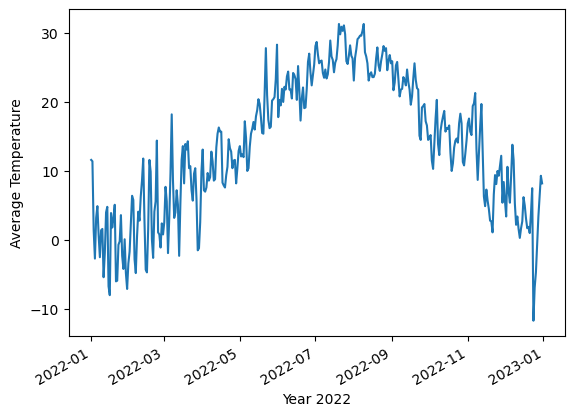

In [21]:
df_temp_clean.plot(xlabel= 'Year 2022',ylabel='Average Temperature')

#### Create a column with the count of trips per day and merge it with the weather dataframe

In [22]:
df_merged.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp'],
      dtype='object')

In [23]:
# Groupby the count of the trips 
df_group = pd.DataFrame(df_merged.groupby(['date'])['ride_id'].count()).reset_index()

In [24]:
# Renaming the ride_id column as trip_count for clarity.
df_group.rename(columns = {'ride_id':'trip_count'}, inplace = True)
# Merging trip count data with weather data.
df_final = df_merged.merge(df_group, on = 'date', how = 'outer', indicator = True)
print(df_final['_merge'].value_counts(dropna = False))
print("Shape of January 1st is", df_final[df_final['date'] == '2022-01-01'].shape) # Check
print("Shape of January 2nd is", df_final[df_final['date'] == '2022-01-02'].shape) # Second check


_merge
both          29838806
left_only            0
right_only           0
Name: count, dtype: int64
Shape of January 1st is (20428, 17)
Shape of January 2nd is (43009, 17)


In [25]:
df_merged = df_final.set_index('date')
print(df_merged.columns)

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', 'trip_count', '_merge'],
      dtype='object')


In [26]:
df_merged.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,trip_count,_merge
date,,,,,,,,,,,,,,,,
2021-01-30,34BD74D84D320CF5,electric_bike,2021-01-30 17:30:45.544,2022-05-23 06:17:27.131,W 144 St & Adam Clayton Powell Blvd,7932.1,Frederick Douglass Blvd & W 112 St,7631.23,40.820877,-73.939249,40.801694,-73.957145,casual,NaN,1,both
2021-02-15,FA436228F4CD7647,classic_bike,2021-02-15 14:11:20.946,2022-08-10 15:01:30.839,Kent Ave & S 11 St,5062.01,Union Ave & Jackson St,5300.06,40.707645,-73.968415,40.716075,-73.952029,casual,NaN,1,both
2021-03-11,8FC77EAE2C0561E4,classic_bike,2021-03-11 22:08:54.461,2022-06-16 09:12:21.565,Union St & 4 Ave,4175.15,Flatbush Ave & Ocean Ave,3704.04,40.677274,-73.982820,40.663657,-73.963014,casual,NaN,1,both
2021-03-14,BF45D1E037463AA8,classic_bike,2021-03-14 18:17:59.923,2022-02-02 23:38:01.993,N 12 St & Bedford Ave,5450.04,S Portland Ave & Hanson Pl,4354.05,40.720798,-73.954847,40.685396,-73.974315,member,NaN,1,both
2021-03-31,763D82F8CFA1D9D1,classic_bike,2021-03-31 15:35:20.070,2022-09-25 14:33:21.607,Willoughby St & Fleet St,4628.05,DeKalb Ave & Franklin Ave,4528.01,40.691966,-73.981302,40.690648,-73.957462,casual,NaN,1,both


#### Create a line chart of bike trip counts and temperatures plotted on a dual axis

Object oriented approach

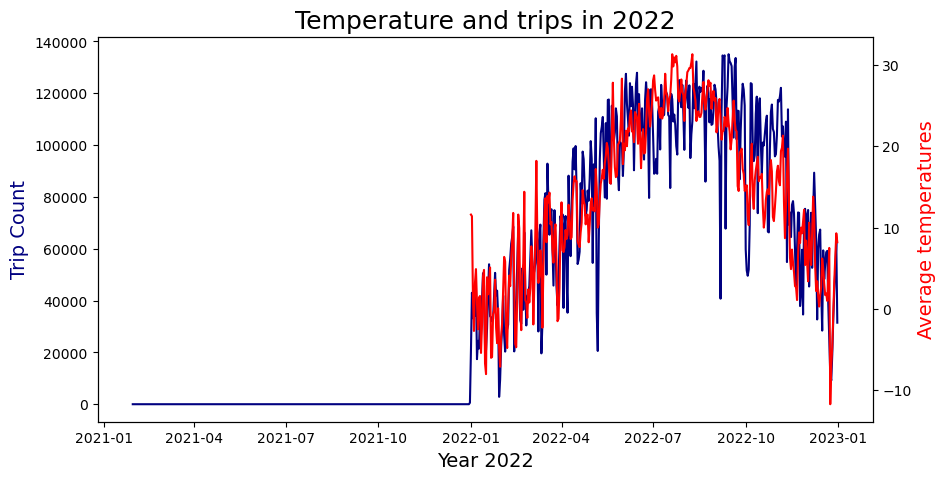

In [33]:
# Create figure and axis objects with subplots() and details
fig,ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df_merged['trip_count'],color = "navy")
ax.set_xlabel("Year 2022", fontsize = 14) # set x-axis label
ax.set_ylabel("Trip Count",color = "navy", fontsize = 14) # set y-axis label

# Here is where we create the dual axis - initialize a twin object for two different y-axis on the sample plot
ax2 = ax.twinx()

# Make a plot with the temperatures on the y-axis using second axis object
ax2.plot(df_merged['avgTemp'], color = "red")
ax2.set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.title('Temperature and trips in 2022', fontsize = 18)
plt.show()

This code leverages Matplotlib's object-oriented paradigm to create a dual-axis plot that compares two different datasets on the same figure. First, it initializes a figure and a primary axes object using 'plt.subplots()', specifying the size of the plot. It then plots the 'trip_count' data on this axes, customizing the line color and labeling the axes to indicate that the data represents the number of trips in 2022. To overlay a second dataset, the code creates a secondary y-axis that shares the same x-axis using the 'twinx()' method. On this second axes, it plots the 'avgTemp' data, assigning a distinct color and label to differentiate it from the trip count data. Finally, it adds a title to the overall plot and displays everything visually. This approach exemplifies the object-oriented approach in Matplotlib, providing precise control over individual plot components such as axes, labels, and multiple data series, making it particularly effective for complex visualizations involving multiple scales.